In [24]:
from manim import *
from manim_mobject_svg import *
config.media_embed = True
param= "-v WARNING  --progress_bar None --format=gif  -r  500,200  --disable_caching Example"
# param= "-v WARNING  --progress_bar None   -r  500,200 --fps=23 --disable_caching Example"
stix2 = TexTemplate()
stix2.add_to_preamble(r"\usepackage{stix2}", prepend= True)
def TexS(*tex_strings, **kwargs):
    return Tex(*tex_strings, tex_template=stix2,  **kwargs)
def MathTexS(*tex_strings, **kwargs):
    return MathTex(*tex_strings,tex_template=stix2, **kwargs)


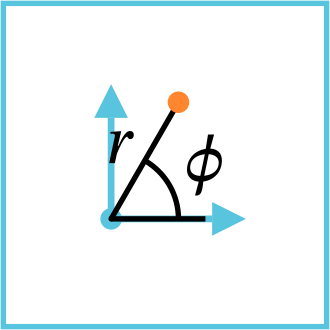

In [25]:
g = VGroup(Square().scale(1.2))
g.set_color(BLUE)
coordinate_system = VGroup(Dot([0,0,0]),Arrow(ORIGIN, 1*UP, buff=0), Arrow(ORIGIN, 1*RIGHT, buff=0 )).shift((DOWN+LEFT)*0.4)
coordinate_system.set_color(BLUE)

CENTER_POLAR = coordinate_system.submobjects[0].get_center()
small_dot = Dot(color=BLACK, point=CENTER_POLAR, radius=0.02) 
line1 = Line(CENTER_POLAR,CENTER_POLAR+ 0.7*RIGHT).set_color(BLACK)

def make_moving_objects(rr, tt):
    moving_line = Line(CENTER_POLAR,CENTER_POLAR+ rr * UP).set_color(BLACK).rotate(-tt * DEGREES, about_point=CENTER_POLAR)
    do = Dot(moving_line.get_end(), color=ORANGE , z_index=10)
    rval= MathTexS("r" , color=BLACK)
    rval.move_to(moving_line.get_center()+moving_line.copy().rotate(PI / 2).get_unit_vector()*0.2)
    a = Angle(line1, moving_line, radius=0.5, other_angle=False , color=BLACK)
    te = MathTexS(r"\phi",  color=BLACK).move_to(
        Angle(
            line1, moving_line, radius=0.5 + 3 * SMALL_BUFF, other_angle=False 
        ).point_from_proportion(0.5)
    )
    return moving_line,do, rval,  a, te

moving_line,do, rval,  a, te = make_moving_objects(1, 30)


g += VGroup(coordinate_system,small_dot,line1)
g += VGroup(moving_line,do, rval,  a, te)
g

In [7]:
%%manim  -v WARNING -ql  --progress_bar None  --disable_caching BBB

class BBB(Scene):
    def construct(self):
        gx = g.copy()
        self.add(gx)
        moving_objects = gx[2]
        self.camera.background_color =WHITE
        r_tracker=  ValueTracker(0)
        theta_tracker = ValueTracker(49)
        self.wait(0.1)

        def my_upd(mob):
            mob[0].become(Line(CENTER_POLAR, CENTER_POLAR+ (1+r_tracker.get_value()) * RIGHT).rotate((theta_tracker.get_value()) * DEGREES, about_point=CENTER_POLAR))
            mob[0].set_color(BLACK)
            # gr= VGroup(dl,Dot(dl.get_end()))
            # rval.move_to(dl.get_center()+dl.copy().rotate(PI / 2).get_unit_vector()*0.2)
            # mob.become(gr)
        moving_objects.add_updater( my_upd)
        
        # line_moving.add_updater(my_upd)

        
        # a.add_updater(
        #     lambda x: x.become(Angle(line1, line_moving, radius=0.5, other_angle=False))
        # )
        # te.add_updater(
        #     lambda x: x.move_to(
        #         Angle(
        #             line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
        #         ).point_from_proportion(0.5)
        #     )
        # )
        # self.add(g.scale(2))

        # self.play(r_tracker.animate.set_value(1))
        # self.play(r_tracker.animate.set_value(0.2))
        # self.wait(0.1)
        self.play(theta_tracker.animate.set_value(130))
        # self.play(theta_tracker.animate.set_value(49))